# 1. Importation des modules

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# 2. Importation de la base et première analyse

In [29]:
df = pd.read_csv("../data/AmesHousing.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order             2930 non-null   int64 
 1   PID               2930 non-null   int64 
 2   MS SubClass       2930 non-null   int64 
 3   MS Zoning         2930 non-null   object
 4   Lot Frontage      2930 non-null   object
 5   Lot Area          2930 non-null   int64 
 6   Street            2930 non-null   object
 7   Alley             2930 non-null   object
 8   Lot Shape         2930 non-null   object
 9   Land Contour      2930 non-null   object
 10  Utilities         2930 non-null   object
 11  Lot Config        2930 non-null   object
 12  Land Slope        2930 non-null   object
 13  Neighborhood      2930 non-null   object
 14  Condition 1       2930 non-null   object
 15  Condition 2       2930 non-null   object
 16  Bldg Type         2930 non-null   object
 17  House Style   

In [31]:
len(df)

2930

In [32]:
df.columns

Index(['Order ', 'PID        ', 'MS SubClass ', 'MS Zoning ', 'Lot Frontage ',
       'Lot Area ', 'Street ', 'Alley ', 'Lot Shape ', 'Land Contour ',
       'Utilities ', 'Lot Config ', 'Land Slope ', 'Neighborhood ',
       'Condition 1 ', 'Condition 2 ', 'Bldg Type ', 'House Style ',
       'Overall Qual ', 'Overall Cond ', 'Year Built ', 'Year Remod/Add ',
       'Roof Style ', 'Roof Matl ', 'Exterior 1st ', 'Exterior 2nd ',
       'Mas Vnr Type ', 'Mas Vnr Area ', 'Exter Qual ', 'Exter Cond ',
       'Foundation ', 'Bsmt Qual ', 'Bsmt Cond ', 'Bsmt Exposure ',
       'BsmtFin Type 1 ', 'BsmtFin SF 1 ', 'BsmtFin Type 2 ', 'BsmtFin SF 2 ',
       'Bsmt Unf SF ', 'Total Bsmt SF ', 'Heating ', 'Heating QC ',
       'Central Air ', 'Electrical ', '1st Flr SF ', '2nd Flr SF ',
       'Low Qual Fin SF ', 'Gr Liv Area ', 'Bsmt Full Bath ',
       'Bsmt Half Bath ', 'Full Bath ', 'Half Bath ', 'Bedroom AbvGr ',
       'Kitchen AbvGr ', 'Kitchen Qual ', 'TotRms AbvGrd ', 'Functional ',
    

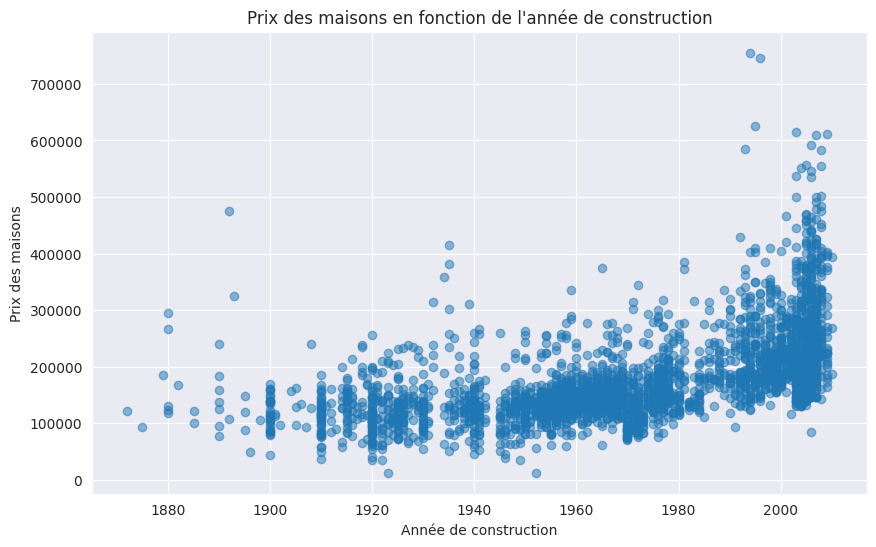

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Year Built '], df['SalePrice'], alpha=0.5)
plt.title('Prix des maisons en fonction de l\'année de construction')
plt.xlabel('Année de construction')
plt.ylabel('Prix des maisons')
plt.grid(True)
plt.show()


In [34]:
df['Year Built '].describe()

count    2930.000000
mean     1971.356314
std        30.245361
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: Year Built , dtype: float64

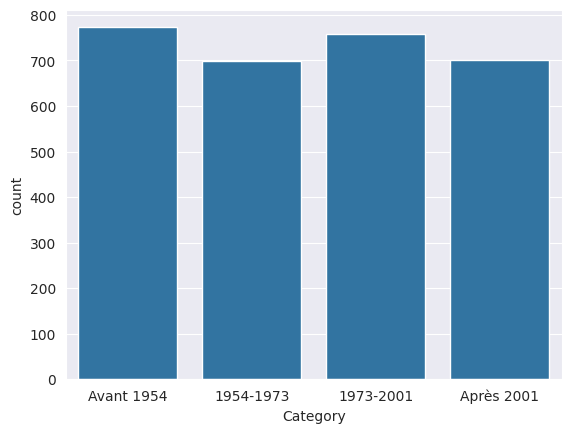

In [35]:
# Définir les seuils pour catégoriser les années de construction
seuil1 = 1954
seuil2 = 1973
seuil3 = 2001

# Créer une nouvelle colonne "Category" basée sur les seuils
df['Category'] = pd.cut(df['Year Built '], bins=[0, seuil1, seuil2, seuil3, df['Year Built '].max()], labels=['Avant 1954', '1954-1973', '1973-2001', 'Après 2001'])

# Visualiser la distribution des catégories
sns.countplot(data=df, x='Category')
plt.show()

In [36]:
df['Rénovation'] = df['Yr Sold '] - df['Year Remod/Add ']
df.loc[df['Year Built '] == df['Year Remod/Add '], 'Rénovation'] = np.nan
renovation_counts = df['Rénovation'].value_counts()
# print(renovation_counts)
df[['Yr Sold ','Year Remod/Add ','Year Built ', 'Rénovation']]
df['Rénovation'].describe()

count    1361.000000
mean       21.656135
std        22.566227
min        -2.000000
25%         4.000000
50%        11.000000
75%        55.000000
max        60.000000
Name: Rénovation, dtype: float64

In [37]:
import pandas as pd

# Créer une nouvelle colonne "Category" basée sur les conditions
conditions = [
    (df['Year Built '] < 1954) & (df['Year Remod/Add '] < (df['Yr Sold '] - 10)),
    (df['Year Built '] < 1954) & (df['Year Remod/Add '] >= (df['Yr Sold '] - 10)),
    (df['Year Built '] >= 1954) & (df['Year Built '] <= 1973) & (df['Year Remod/Add '] < (df['Yr Sold '] - 10)),
    (df['Year Built '] >= 1954) & (df['Year Built '] <= 1973) & (df['Year Remod/Add '] >= (df['Yr Sold '] - 10)),
    (df['Year Built '] > 1973) & (df['Year Built '] <= 2001) & (df['Year Remod/Add '] < (df['Yr Sold '] - 10)),
    (df['Year Built '] > 1973) & (df['Year Built '] <= 2001) & (df['Year Remod/Add '] >= (df['Yr Sold '] - 10)),
    (df['Year Built '] > 2001)
]

choices = ['Avant 1954', 'Avant 1954 avec rénovation', '1954-1973', '1954-1973 avec rénovation', '1973-2001', '1973-2001 avec rénovation', 'Après 2001']

df['Category'] = pd.np.select(conditions, choices, default='Unknown')
df = df[(df['Year Built '] >= df['Year Remod/Add ']) | (df['Yr Sold '] >= df['Year Remod/Add '])]
df['Category'].value_counts()

/tmp/ipykernel_8530/4013609984.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Category'] = pd.np.select(conditions, choices, default='Unknown')


Après 2001                    697
1954-1973                     630
Avant 1954                    566
1973-2001                     517
1973-2001 avec rénovation     242
Avant 1954 avec rénovation    164
1954-1973 avec rénovation     111
Name: Category, dtype: int64

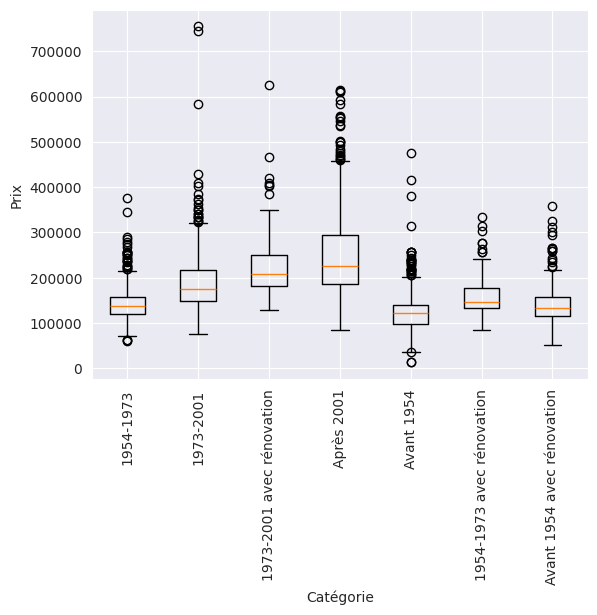

In [38]:
import matplotlib.pyplot as plt

# Create a dictionary to store the prices for each category
category_prices = {}
for category in df['Category'].unique():
    category_prices[category] = df.loc[df['Category'] == category, 'SalePrice']

# Create a list of prices for each category
category_data = [category_prices[category] for category in df['Category'].unique()]

# Create the boxplot
plt.boxplot(category_data, labels=df['Category'].unique())

# Add labels to the axes
plt.xlabel('Catégorie')
plt.ylabel('Prix')

# Rotate the category labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

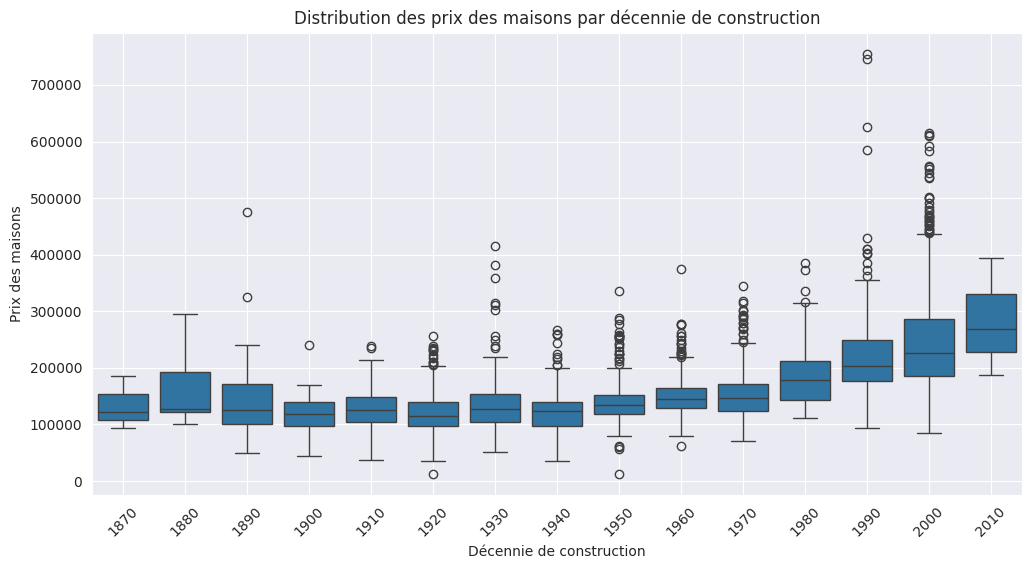

In [39]:
import seaborn as sns

# Création de la période basée sur les décennies
df['Decade'] = (df['Year Built '] // 10) * 10

plt.figure(figsize=(12, 6))
sns.boxplot(x='Decade', y='SalePrice', data=df)
plt.title('Distribution des prix des maisons par décennie de construction')
plt.xlabel('Décennie de construction')
plt.ylabel('Prix des maisons')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


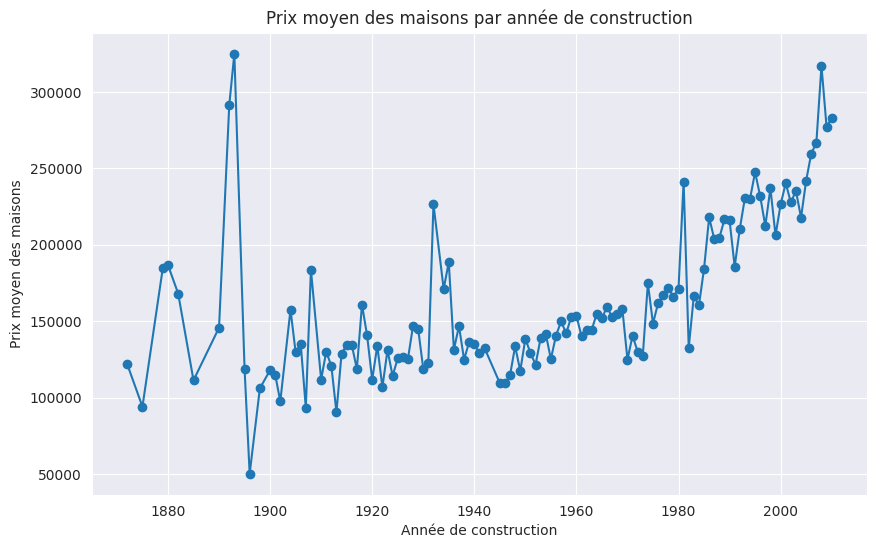

In [40]:
mean_price_by_year = df.groupby('Year Built ')['SalePrice'].mean()

plt.figure(figsize=(10, 6))
mean_price_by_year.plot(marker='o')
plt.title('Prix moyen des maisons par année de construction')
plt.xlabel('Année de construction')
plt.ylabel('Prix moyen des maisons')
plt.grid(True)
plt.show()

In [41]:
# Calculer la différence entre "Year Remod/Add" et "Year Built" et assigner le résultat à la colonne "c"
df['c'] = df['Year Remod/Add '] - df['Year Built ']

# Remplacer les valeurs égales à zéro par des valeurs nulles (NaN)
df.loc[df['c'] == 0, 'c'] = np.nan

# Utiliser la méthode describe() pour obtenir les statistiques descriptives de la colonne "c"
c_description = df['c'].describe()

# Afficher les statistiques descriptives
print(c_description)

count    1358.000000
mean       27.852725
std        28.812413
min        -1.000000
25%         1.000000
50%        22.000000
75%        44.000000
max       127.000000
Name: c, dtype: float64


In [42]:
df['Rénovation'].value_counts()

0.0     124
56.0     91
1.0      85
59.0     71
57.0     68
58.0     68
3.0      60
2.0      59
4.0      58
8.0      55
5.0      54
9.0      42
60.0     42
12.0     41
13.0     39
6.0      38
10.0     38
7.0      37
11.0     36
14.0     34
16.0     30
15.0     25
17.0     19
19.0     11
20.0     11
27.0      9
18.0      9
21.0      8
26.0      7
23.0      7
22.0      7
25.0      6
32.0      5
31.0      5
38.0      5
44.0      5
36.0      5
28.0      5
48.0      4
39.0      4
33.0      4
29.0      3
24.0      3
34.0      3
43.0      3
51.0      2
50.0      2
35.0      2
30.0      2
53.0      2
55.0      1
40.0      1
41.0      1
49.0      1
47.0      1
Name: Rénovation, dtype: int64

In [43]:
# Obtenir les indices des lignes contenant des valeurs négatives dans la colonne "Rénovation"
negative_indices = df[df['Rénovation'] < 0].index

# Supprimer les lignes correspondantes du DataFrame
df.drop(negative_indices, inplace=True)

In [44]:
# Vérifier s'il y a des valeurs négatives
negative_values = df[df['Rénovation'] < 0]
num_negative_values = len(negative_values)

# Compter les valeurs entre 0 et 10
values_between_0_and_10 = df[(df['Rénovation'] >= 0) & (df['Rénovation'] <= 10)]
num_values_between_0_and_10 = len(values_between_0_and_10)

# Afficher les résultats
print("Nombre de valeurs négatives : ", num_negative_values)
print("Nombre de valeurs entre 0 et 10 : ", num_values_between_0_and_10)

Nombre de valeurs négatives :  0
Nombre de valeurs entre 0 et 10 :  650


In [45]:
# Calculer la durée de rénovation
df['Renovation Years'] = 2010 - df['Year Remod/Add ']
df.loc[df['Year Built '] == df['Year Remod/Add '], 'Renovation Years'] = 0

# Afficher les résultats
print(df[['Year Built ', 'Year Remod/Add ', 'Renovation Years']])

      Year Built   Year Remod/Add   Renovation Years
0            1960             1960                 0
1            1961             1961                 0
2            1958             1958                 0
3            1968             1968                 0
4            1997             1998                12
...           ...              ...               ...
2925         1984             1984                 0
2926         1983             1983                 0
2927         1992             1992                 0
2928         1974             1975                35
2929         1993             1994                16

[2927 rows x 3 columns]


In [46]:
# Définir les seuils pour catégoriser les années de construction
seuil1 = 1950
seuil2 = 1980
seuil3 = 2000

# Créer une nouvelle colonne "Category" basée sur les seuils
df['Category'] = pd.cut(df['Year Built'], bins=[0, seuil1, seuil2, seuil3, df['Year Built'].max()], labels=['Avant 1950', 'Avant 1980', 'Avant 2000', 'plus de 2000'])

# Visualiser la distribution des catégories
sns.countplot(data=df, x='Category')
plt.show()

KeyError: 'Year Built'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order             2930 non-null   int64 
 1   PID               2930 non-null   int64 
 2   MS SubClass       2930 non-null   int64 
 3   MS Zoning         2930 non-null   object
 4   Lot Frontage      2930 non-null   object
 5   Lot Area          2930 non-null   int64 
 6   Street            2930 non-null   object
 7   Alley             2930 non-null   object
 8   Lot Shape         2930 non-null   object
 9   Land Contour      2930 non-null   object
 10  Utilities         2930 non-null   object
 11  Lot Config        2930 non-null   object
 12  Land Slope        2930 non-null   object
 13  Neighborhood      2930 non-null   object
 14  Condition 1       2930 non-null   object
 15  Condition 2       2930 non-null   object
 16  Bldg Type         2930 non-null   object
 17  House Style   

In [47]:
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Category,Rénovation,Decade,c,Renovation Years
0,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,5,2010,WD,Normal,215000,1954-1973,NaN,1960,NaN,0
1,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,6,2010,WD,Normal,105000,1954-1973,NaN,1960,NaN,0
2,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,6,2010,WD,Normal,172000,1954-1973,NaN,1950,NaN,0
3,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,4,2010,WD,Normal,244000,1954-1973,NaN,1960,NaN,0
4,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,3,2010,WD,Normal,189900,1973-2001,12.0,1990,1.0,12


In [48]:
len(df)

2927

# 3. séparation des jeux entre train et split pour ne pas avoir de data leaking

In [49]:
y = df["SalePrice"]
X = df.drop(["SalePrice"], axis =1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. nettoyage de données

In [51]:
df = pd.concat((X_train,y_train), axis =1)
df.shape

(2341, 87)

## Valeurs maquantes

On supprime les colonnes inutiles ou avec trop de valeurs nulles

In [52]:
# Supprimer les espaces supplémentaires autour des noms de colonnes
df.columns = df.columns.str.strip()


In [53]:
df = df.drop(["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"], axis=1)

In [54]:
len(df)

2341

In [55]:
df.shape

(2341, 80)

# 4. Analyse de données

In [56]:
df.iloc[:,0:15]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style
2262,20,RL,89,10991,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story
1677,160,RM,21,2058,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story
2778,60,RL,95,13450,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story
2506,160,FV,30,3180,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story
1088,60,RL,51,8029,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,190,RL,195,41600,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,Norm,2fmCon,1Story
1095,60,RL,,7750,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story
1130,60,FV,64,8791,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story
1294,50,RM,81,7308,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin


In [57]:
cat_col = ['MS SubClass', 'MS Zoning',
        'Street','Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
        'Overall Cond', 'Roof Style',
        'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
        'Mas Vnr Type', 'Exter Qual',
        'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1',  'BsmtFin Type 2', 
        'Heating', 'Heating QC', 'Central Air',
        'Electrical',  'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
        'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
        'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
        'Garage Finish', 'Garage Cars', 
        'Garage Qual', 'Garage Cond', 'Paved Drive',  'Enclosed Porch', '3Ssn Porch',  'Mo Sold',  'Sale Type',
        'Sale Condition']

num_col = ['Lot Frontage', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
        'Total Bsmt SF','1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
        'Gr Liv Area','Garage Yr Blt', 'Garage Area','Wood Deck SF',
        'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val','Yr Sold', "Enclosed Porch", "3Ssn Porch",  'SalePrice']

## Analyse des variables quantitatives

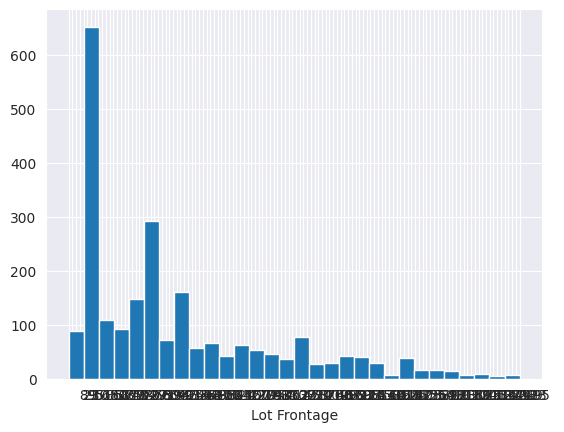

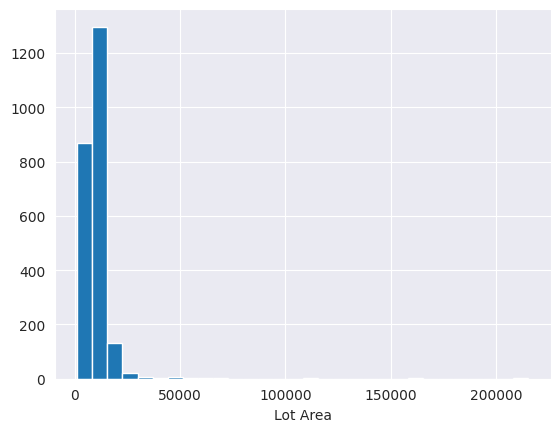

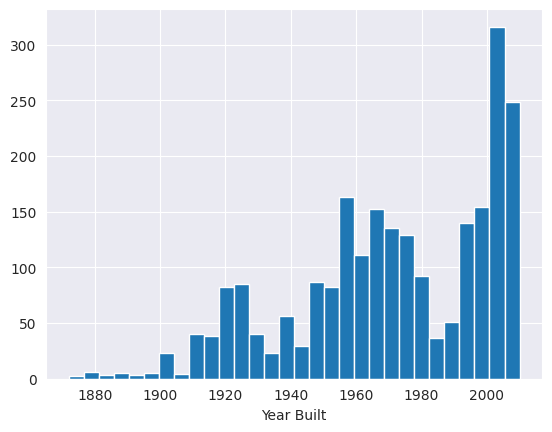

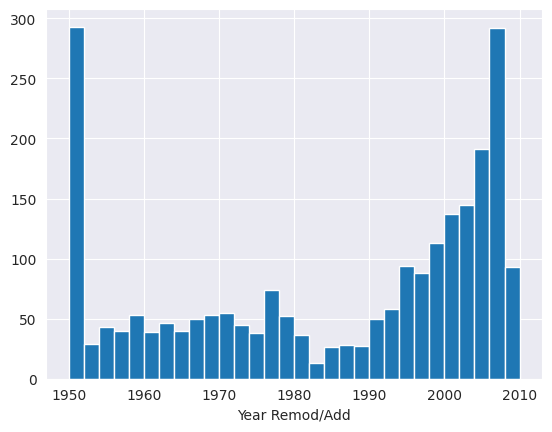

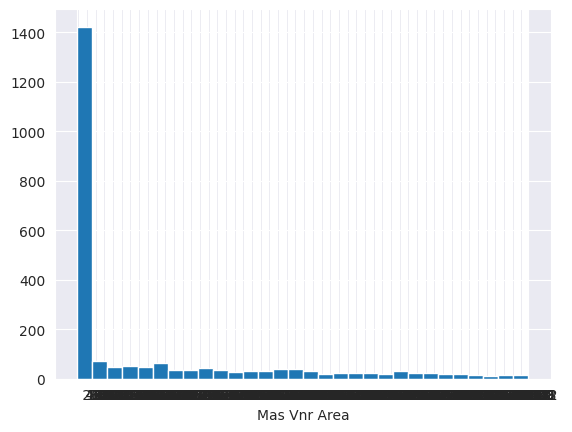

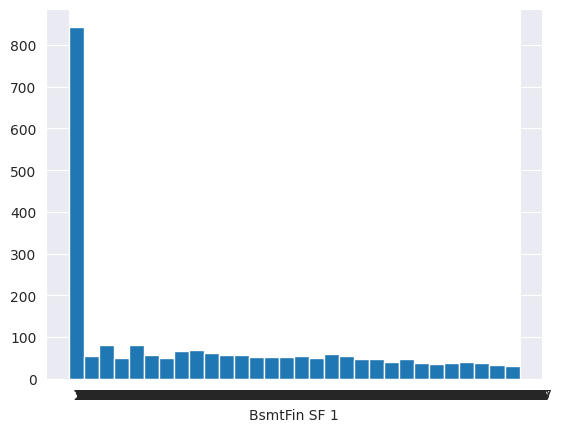

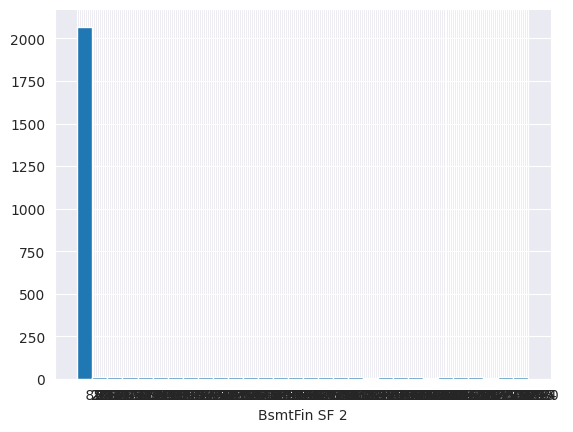

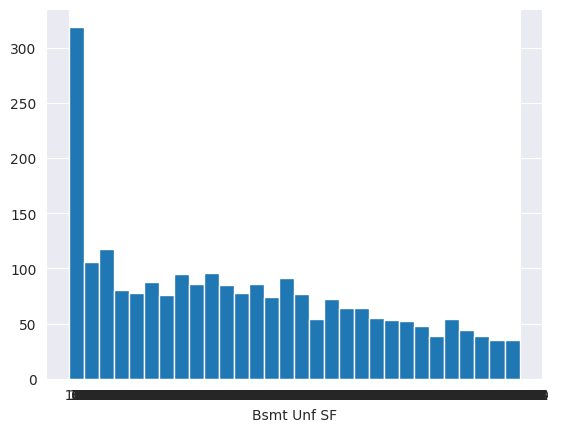

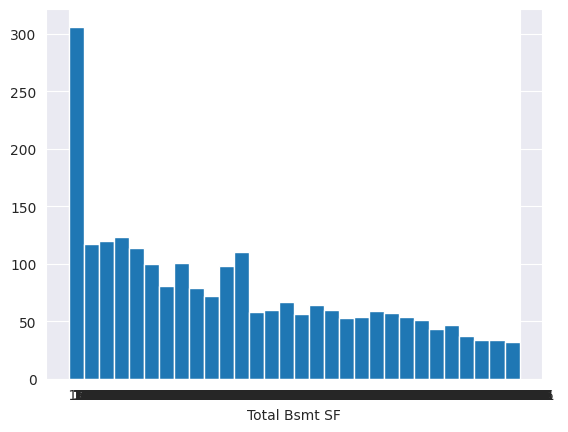

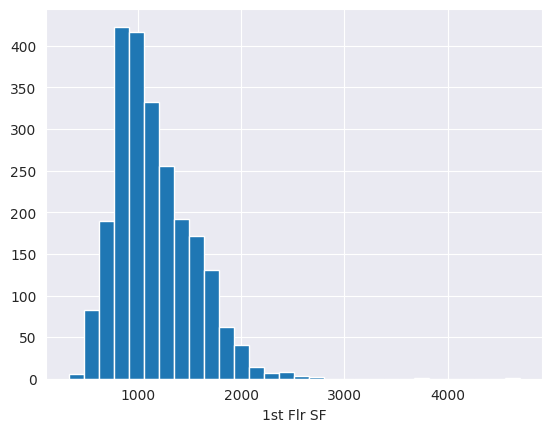

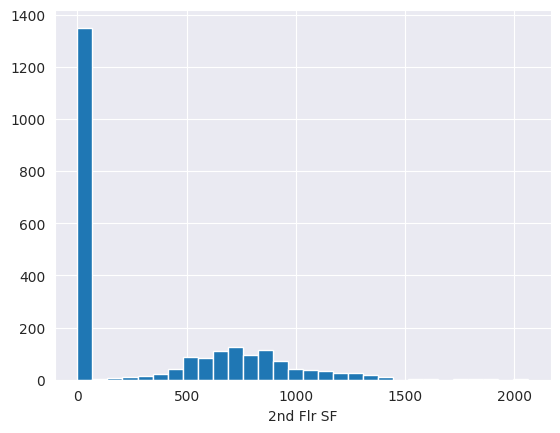

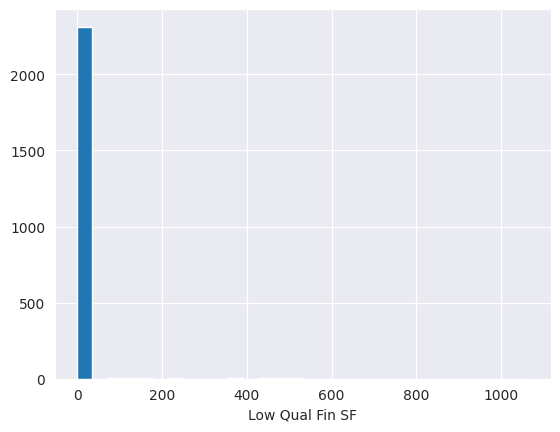

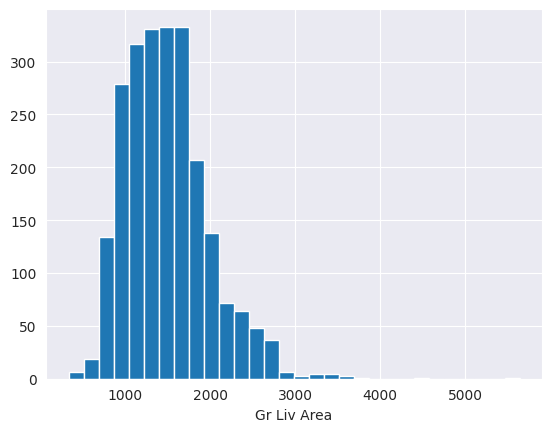

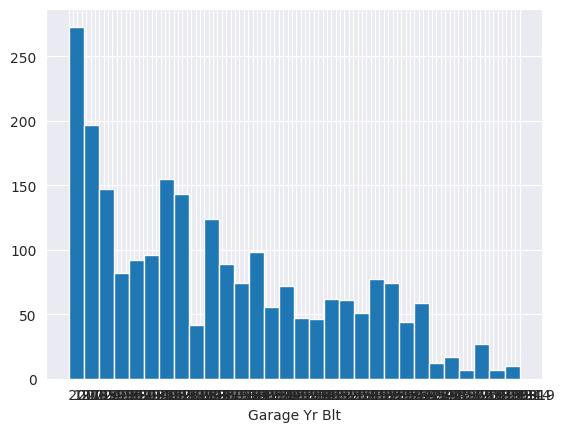

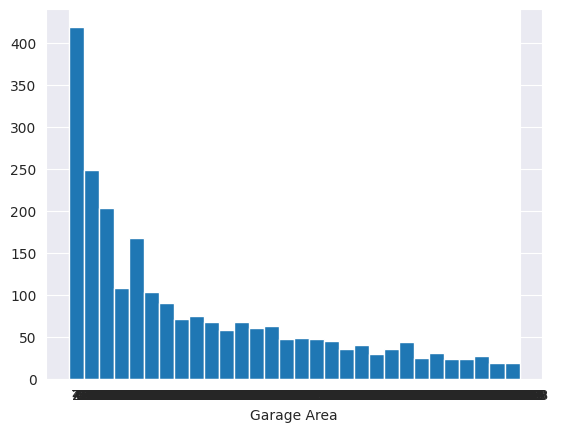

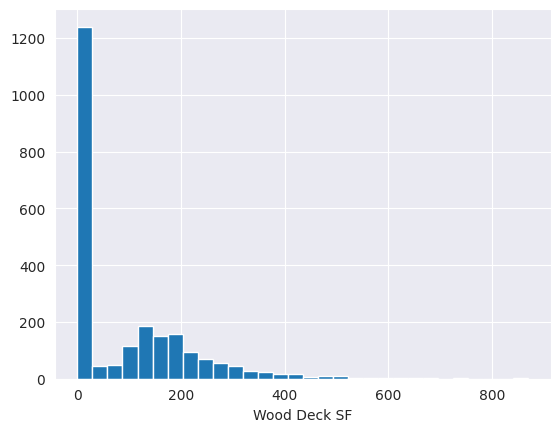

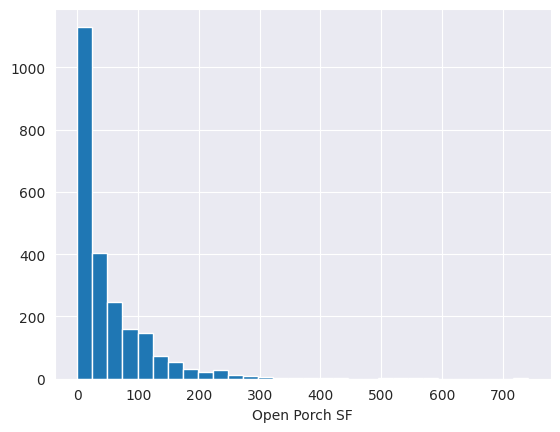

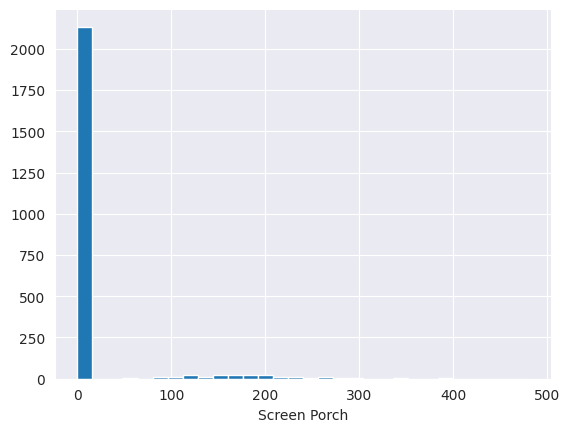

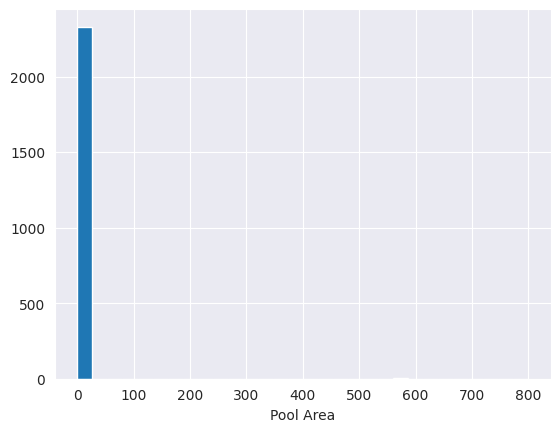

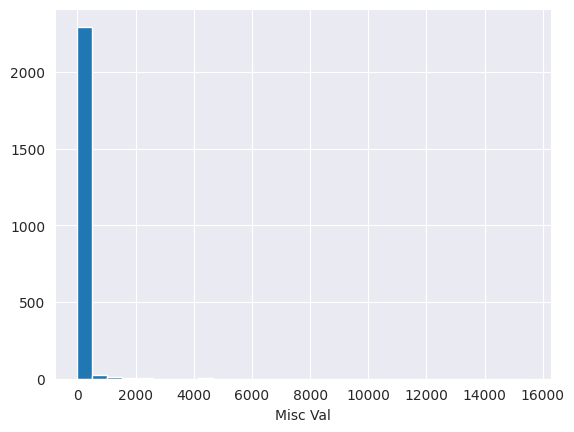

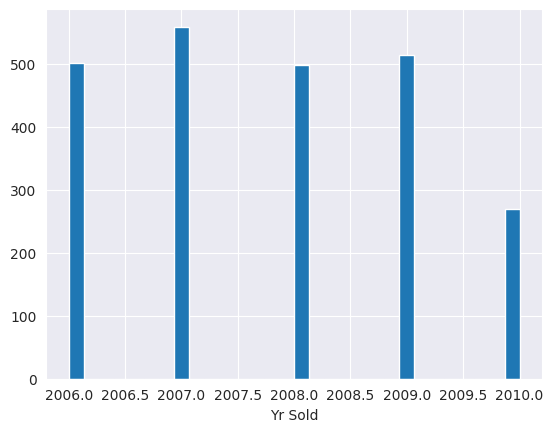

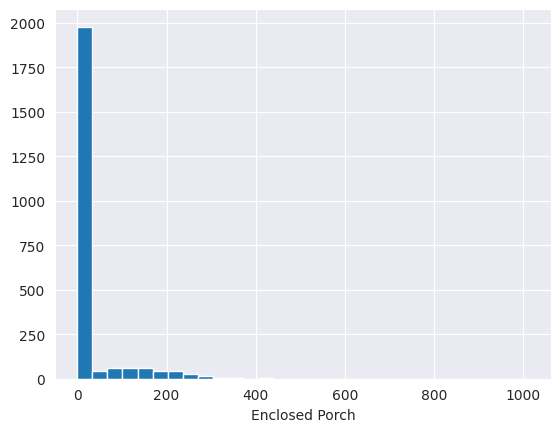

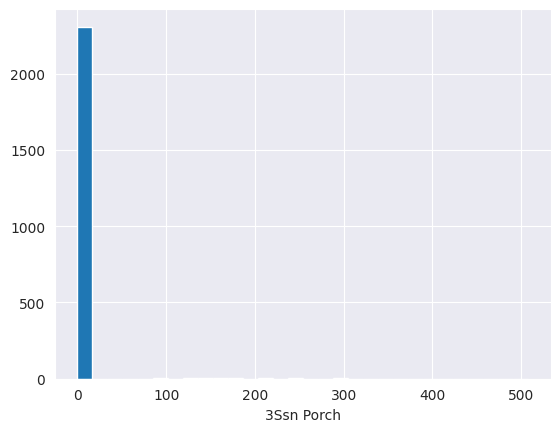

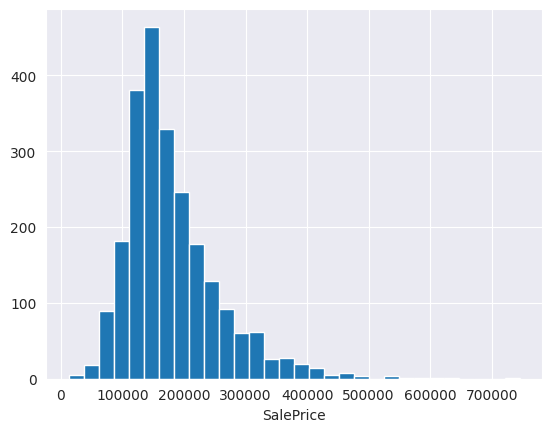

In [58]:
for col in num_col:
    plt.figure()
    plt.hist(x=df[col], bins=30)
    plt.xlabel(col)
    plt.show()

On supprimer les colonnes avec une valeur unique

In [59]:
to_drop = [ 'BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val', "3Ssn Porch"]

In [60]:
df= df.drop(to_drop,axis=1)

## Analyse des variables catégorielles

On commence par rechercher les colonnes dont la distribution est la plus déséquilibrée

On peut distinguer:
- les colonnes complétement déséquilibrées (une valeur pèse au moins 95%) : on les supprime
- les colonnes déséquilibrées (une valeur pèse au moins 85%): s'il n'y a pas d'écart significatif entre les moyennes de saleprice pour chaque catégorie, on les supprime également.

In [61]:
highly_unbalanced_col = ["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]

unbalanced_col = ["Land Slope", "Land Contour", "Condition 1", "Bldg Type", "Exter Cond", "Bsmt Cond", 
            "BsmtFin Type 2", "Central Air", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]

In [62]:
df = df.drop(highly_unbalanced_col, axis=1)

In [63]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Paved Drive', 'Wood Deck SF',
       'Enclosed Porch', 'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition',
       'C

In [64]:
len(df)

2341

In [65]:


# Obtenir les valeurs uniques de la colonne1
valeurs_uniques = df['Half Bath'].value_counts()
valeurs_uniques2 = df['Bsmt Full Bath'].drop_duplicates()
# Afficher les valeurs uniques
print(valeurs_uniques)

0    1480
1     840
2      21
Name: Half Bath, dtype: int64


In [66]:
df[["Land Slope", "SalePrice"]].groupby(by="Land Slope").mean()


,SalePrice
Land Slope,
Gtl,178632.428891
Mod,205184.031579
Sev,239145.000000


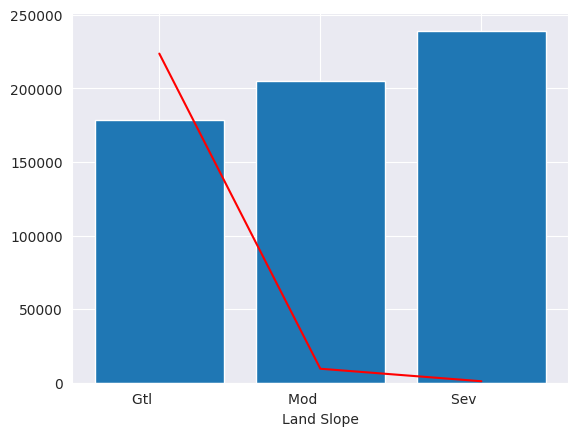

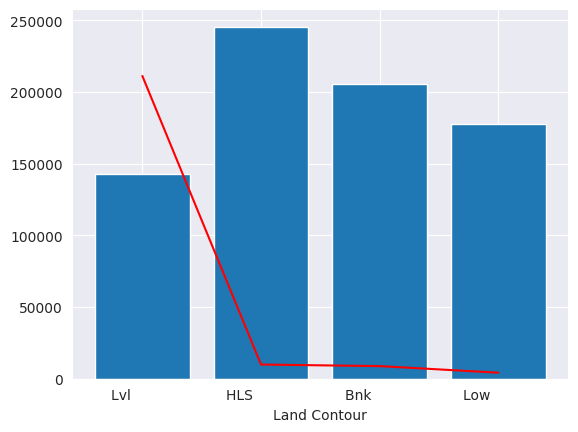

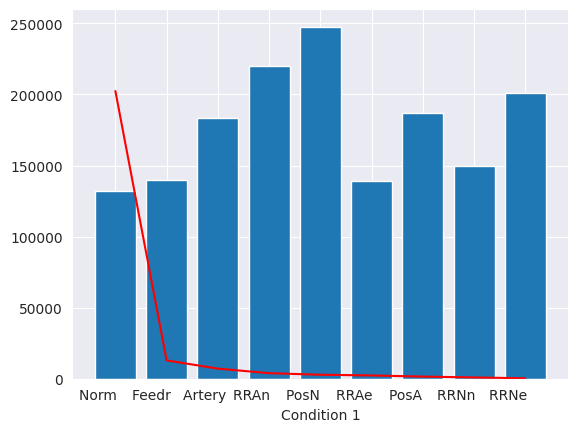

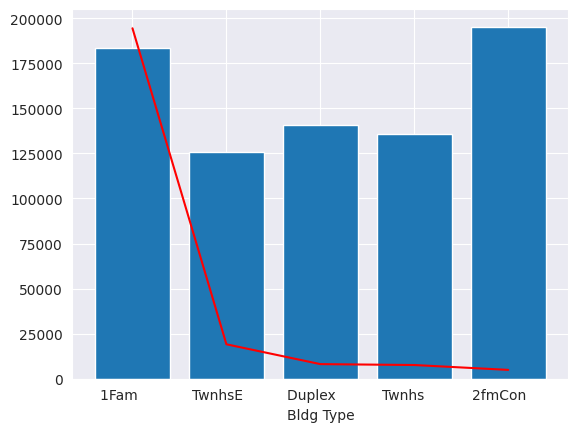

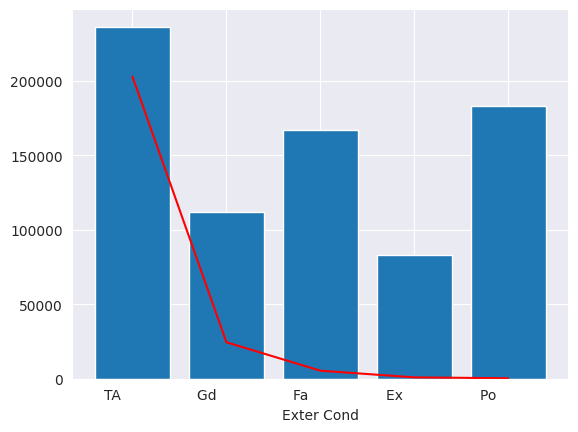

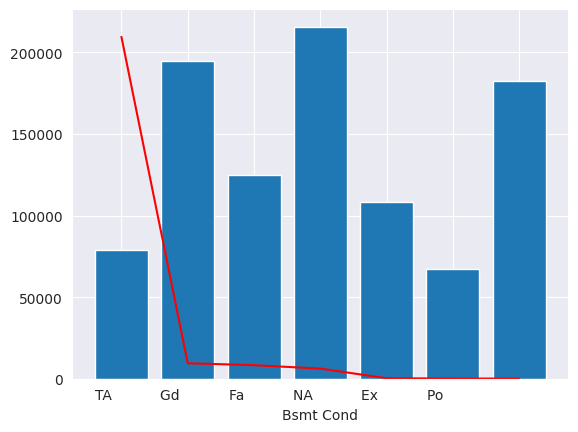

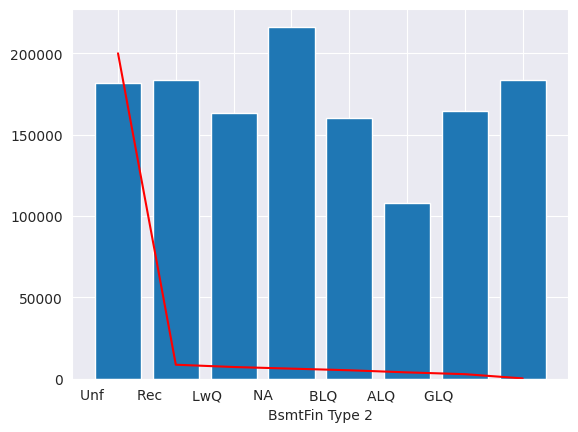

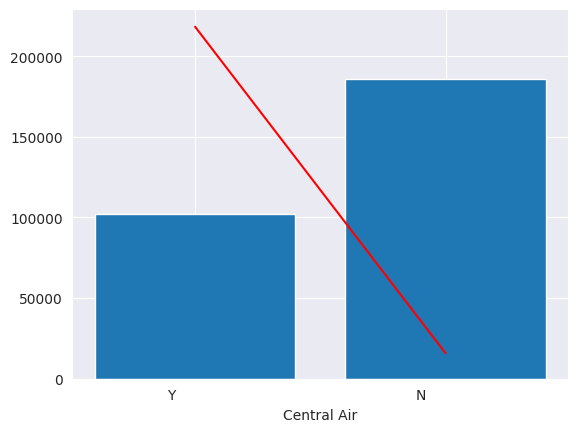

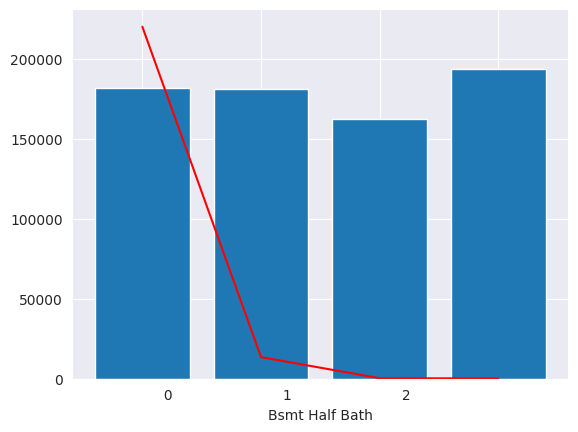

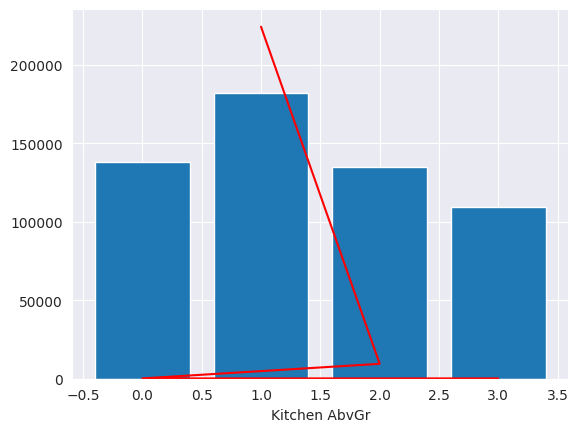

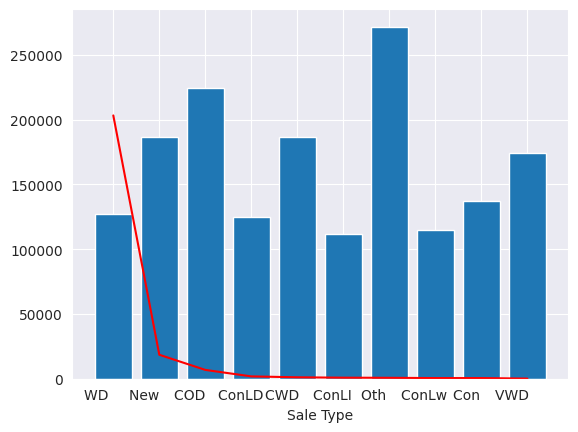

In [67]:
for i,col in enumerate(unbalanced_col,1): 
    plt.figure()
    df_fig = df[[col, "SalePrice"]].groupby(by=col).mean()
    plt.bar(df_fig.index, df_fig.SalePrice)
    df[col].value_counts().apply(lambda x:x*100).plot(kind='line',c="red")
    plt.xlabel(col)
    plt.show()

In [68]:
to_keep = [ "Land Contour", "Bldg Type", "Exter Cond", "Bsmt Cond",  "Central Air"]
to_drop =  ["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
df = df.drop(to_drop, axis=1)

In [69]:
["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"]
["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]
['BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch','Pool Area', 'Misc Val', "3Ssn Porch"]

['BsmtFin SF 2',
 'Low Qual Fin SF',
 'Open Porch SF',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 '3Ssn Porch']

## Analyse des corrélations

In [70]:
df.shape

(2341, 59)

In [71]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [72]:
complete_correlation= associations(df,compute_only=True)

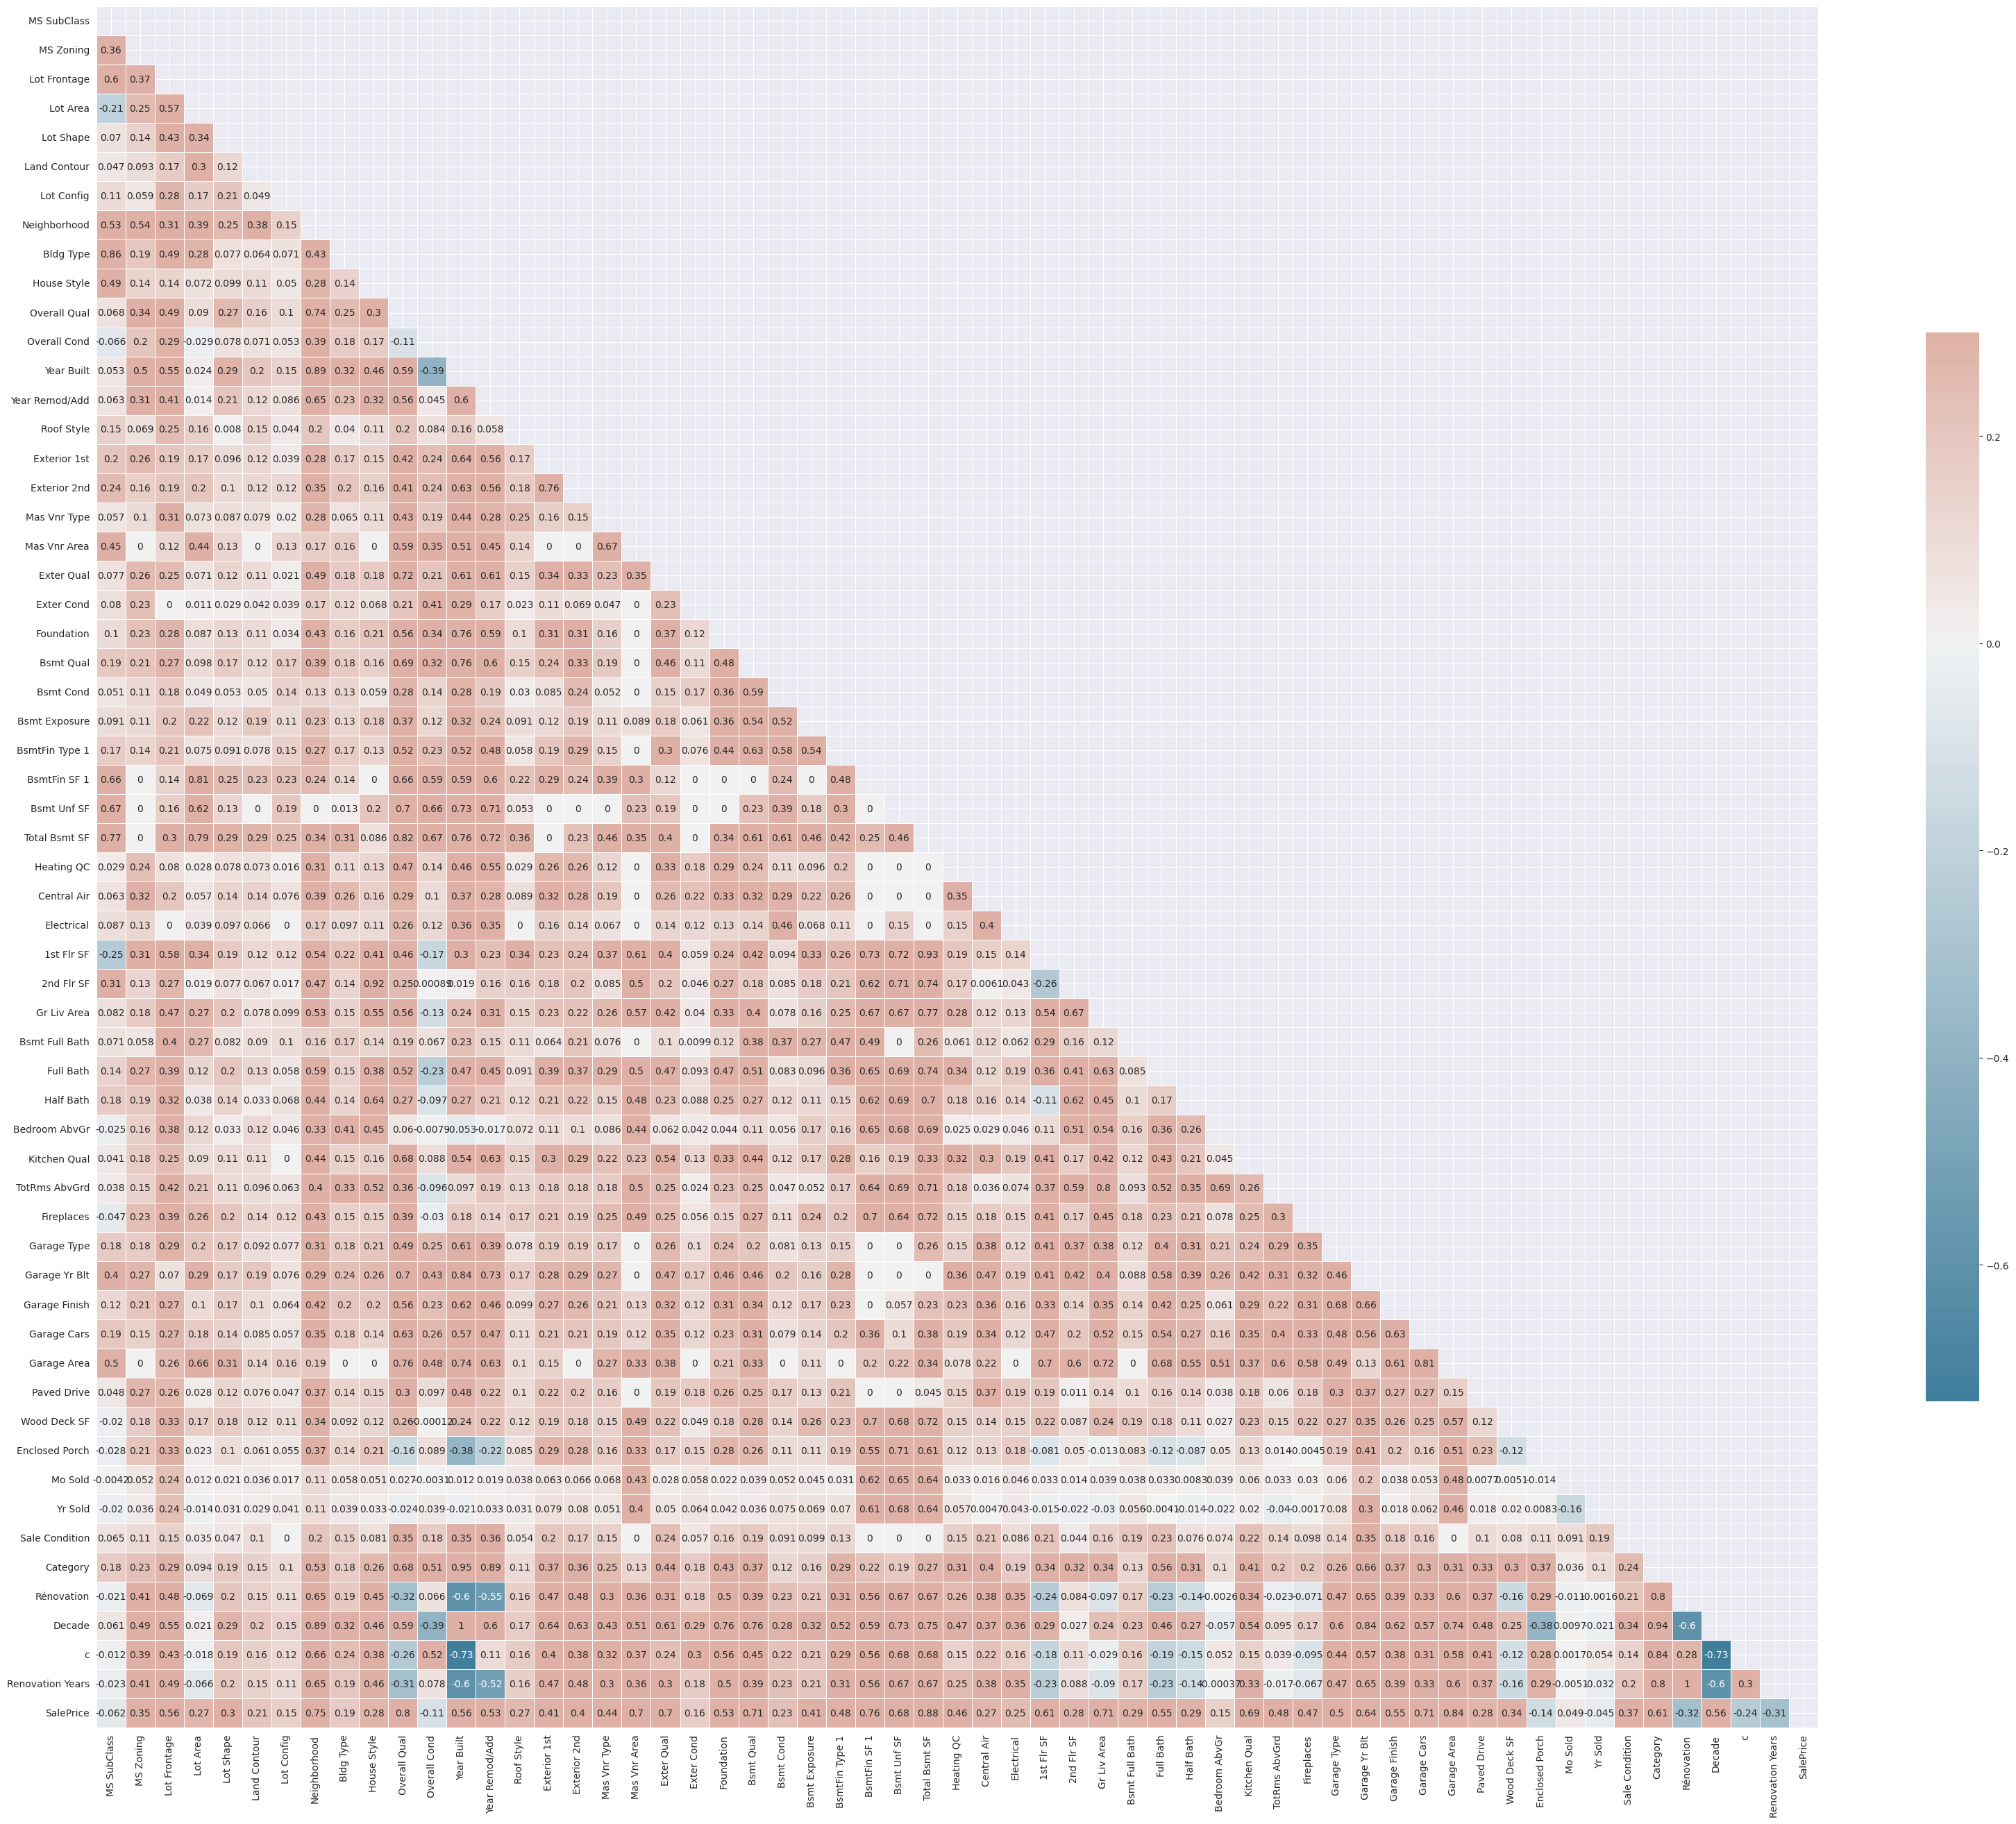

In [73]:
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("corr_matrice.png")

In [74]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Condition', 'Category', 'Rénovation',
       'Decade', 'c', 'Renovation Years', 'SalePrice'],
      dtype='object')

In [75]:
sub_selection = ['Neighborhood', 'Overall Qual', 'Year Built',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF','1st Flr SF', 
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual',  'Garage Finish', 'Garage Cars',
       'Garage Area', 'SalePrice']

In [76]:
df_sub_selection = df[sub_selection]

<Axes: >

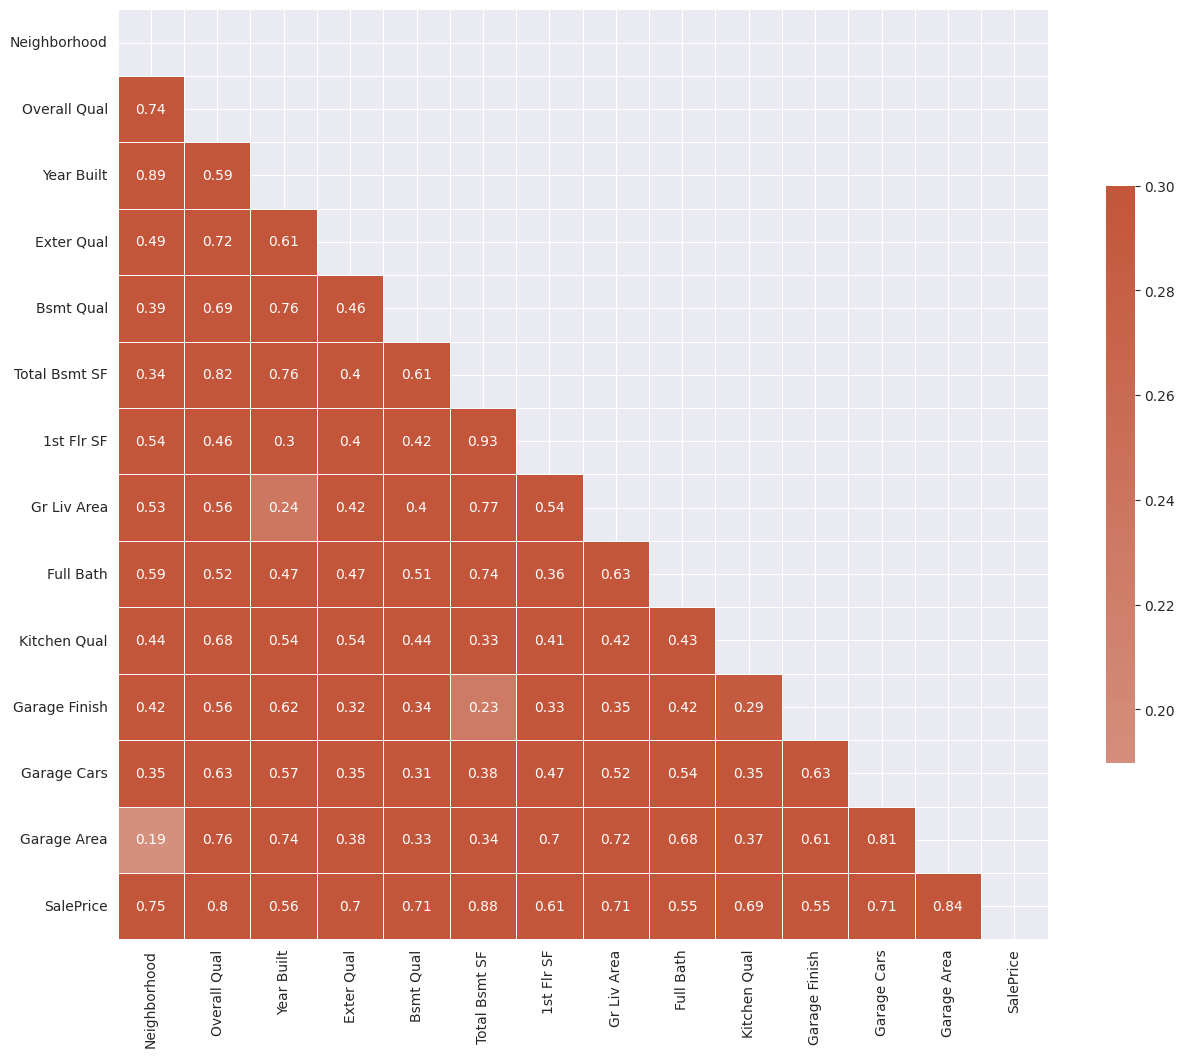

In [77]:
sub_correlation= associations(df_sub_selection,compute_only=True)
mask = np.triu(np.ones_like(sub_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sub_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})


On voit que beaucoup de variables sont corrélées entre elles. On va s'orienter vers un modèle selectif pour pouvoir exclure les variables trop corrélées.

# Préparation des données en vue du modèle

In [78]:
num_selected = ["Year Built", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Area", "SalePrice"]
cat_num = ["Overall Qual", "Full Bath", "Garage Cars"]
cat_str = ["Neighborhood", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Finish"]

In [79]:
df[num_selected].isna().sum()

Year Built       0
Total Bsmt SF    0
1st Flr SF       0
Gr Liv Area      0
Garage Area      0
SalePrice        0
dtype: int64

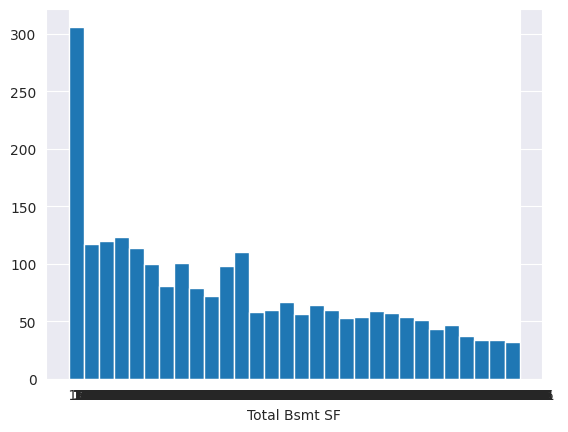

In [80]:
plt.figure()
plt.hist(x=df["Total Bsmt SF"], bins=30)
plt.xlabel("Total Bsmt SF")
plt.show()

In [81]:
df["Total Bsmt SF"].mean()

TypeError: Could not convert          1571           672           916           600           728           551           793           793          1470          1450          1260          1304           936          1008          1226           912          1200             0           915          1753           901           864          1782          1247          1144           982          1492           735           910           848          1222          2461           440          1211           858           873          1417          1120          1055          1510           547          1670           864           795          1324          1675           912           874          1485          1606          1100           756           596          1073          1361           756          1336           984          1660           651           732           894           866           698          1842           840          1027          1476          1618           967           912           884           782           793           432          1980          1242          1950          1596          1103           990          1014           624           955           907           680           992          1050          1216           216           910           845          1746             0           864          1488           660           880          1022           704          1135           715           784          1168           848          1760          1680          1188          1054          1267          1008          1256           882           626          1732          1461          1978           372           656           384          1032          1131             0           672          1160          1066           384           516           546           864          1059          1420           392           560           928          1337          6110           799           960           861          1652          1566          1042          1097          1964          1740          1230          1721           856          1072           747          1184          1800           833             0          1124          1657          1869          1029          1040          1104          1738             0           687          1052          1165           290          1017          1020          1504          1614          1055          1575             0          1372          1614          1392          1580           816           924           756           356          1169           970          1162          1024          1314           840           483          1095          1422          1739           713          1257          1148          1175          1393          1041          1221           983          1370          1237          1578          2271          1752           916           831           901           768           970          1329          1252           409           864          1425          1056          1076          1479          1196          1482          1063          1150           702          1026          1052           985             0           783          1246          1176          1083           423          1098          1212          1341          1107           616           738           407          1501          1501          1570           800          2208           847           728          1067          1803           924           405          1158           788          1680          1666           483          1150           662           630           572          1176          1092             0           893           812          1966             0          1045          1144          1436           970          1097          1063           720           740          1319           864          1152           756          1224          1113          1416           483          1146           768          1440          1284          1334          1344          1434           851          1437           964          1191          1078             0           855          1614           966          1092           912          1921          1112          1082           864           720           864          1109          1153          1092           990          1113          1251          1040           847             0           712           546          1209           855          1220          1584          1021           970          1809           879           784           792           771           780          1848          1720          1952           596          1728           797             0          1008           968          1022          1200           816           864           960           608           723           480          1096          1425          1777          1298          1311           784           483           864          1600          1531           637          1041           844           796          1057          1008          1392           864           808           955           629          1145          1038          1574           894          1080           761           770           945          1463           848          1546          2223          1261           793           675           672          1689           702          1008           621          1475          1444          1092          1108          1496           840           894           773             0           868          1418          1040          1733           782          1152          1280          1684          1698          1721             0             0           756             0          1382           926           768          1257          1176          1147          1710           926          2042          1252           930           832          1824           686          1408           901           864          1235           951             0           981           520           858          1158             0           384          1596          1136           894          1992          1367           979           912          1328             0             0          1121           920          1242          1342          2109           949          1044           698           752           728          1498          1226           824           691           936           728           768           736           920           672           715           896           806          1626          1501          1588           636          2033          1169          1041           848           966           660          1173          1175             0          1680           864           932           990           864           832           672           972           804          2153           725           672          1470           691          1440           583          1432           912          1202           346          1578          1494          1310          1286           961           894           588          1292           858           988           952             0           297          1405           173           624          1004          1568          1056           768           684          1078          1290          3206          1844           864           876          1838          1342          1560          1332          1683           756           540           864           972          1594          1265          1048           928           778          1203           697             0           782             0          1300          1057          1086           900           832           804          1143           970           864           984             0          1751           780           546           840          1044          1269           721           864          1037          1051          1595           628          1214          1365           920           975           789           939          1510           802           930          1494           864           533          1161           959          1620           945          1552           660             0          2121           992           989           798          1650           742           690          1032           192           835           707          1179          1040           520          1273          1099           546          1120           648             0          1468          1790           856          1026           752          1029           925          2024             0          1441           942          1734          1778          1419           816           672          1182          1092           816             0          1372          1168           720           588           972           528          1932          1350          1402          1056          2020          1266           360           841           686           672          1520          1427          1304          1484          1217             0           691          1088          1844          1389          1624           912           925           876           462          1000           608          1173          1001           396           816           988          1220           895           891          1198          1005          1884           836           744          1058          2418           793          1436          1420          1025          1271           675          1277           756           849           546           864          1143           859          1422          1291          1330          1237           996          1486          1833           600           756          1840           988           912           585           952           896          1141           744           784           451          1726           916           756           680          1202          1262           932           912          1126          1560           160          1040          1040          2392           981          1680           840           492           864          1356           806           912           984          1032          1216           780           825          1362           565           768          1566          1141          1582           660          1930          1617          1156           738          1554          1100           833           793          1592           864          1048          1160          1438           729          1587          1231           975          1158          1557          1210           650           816           894          1272          1405           504          2077           384          1536           546           943           929           798          1934           825          1525          1836           992           783          1306           976          1142           936          1056          1704           864          1064           833             0           776           952          1544           855           709           816           468          1128          1212          1538          1240           301          1094           728           992           727           536           858           547          1406             0          1063          1004           592           506          1720          1413           851           547           483           982          1020          1907          1702          1256           804           973           755           816          1065           978          1174           912           853           960           105          1686          1587          1052             0           860          1040           789           967           938             0           929          2217           520          1318           750          1461           847           689           712          1093           910           864           723          1710           936          1722           804          1268           691           894           744           780          1329          1740           837          1679          1606             0           920           941          1043          1546           884          1473           240          1288           741          1800           384          1050           848          1258           796          1763          1664          1349          1779          1187           855          1454           912           884          1243          1453           698          1080           864           686          1650          1352           650          1602          1106           384          1389          1400           765           978           958           624           796          1214           912           925           384          1372           912          1050           264           960          1170           661           420           864           850          1040           926           561          1362           700           879           864             0           720          1604           352           780           847          1947          1392          1188          1298           852          1986           864           686           190           483          1024          1266           725          1007          2036          1574           745          1296          1241          1381           923           768          1242           949           864           803          1100          1670           994           608          1666          1095          1168          1479           381           894          1299           756             0             0           936          1226           953           612           546             0          1144           930          1625          1296          1142           780           969           736           956          1090           965          1334           836           698           697           784          1056           864             0          1127          1698          1104          1370           990           979           928           483          1020           729           845          1088           600           554          1234           715             0          1059          1398          1035          1091          1190          1122           832           807           925          1302          1190           440          1555          1300           516          1151           546          1178          1792           960          1117           617           728          1615           832          1350          1065           888          1542          1395           952          1274           624           882           999           923          1288           932          1348           960           483           855          1143           781           876          1698          1367           969          1251           850           918           744           835          1405          1774          1453          1204           384           892           904          1851           450           901           663             0          1530           738          1099          1162           624           884          1015           884          1478          1232           720           810           928          1006           747           936           728           672          1865           952           984           825           747          1336           876          1094           922           832           935           811          1070          1330           952           796           816          1216          2458           650           448           876          1652           560           570          1529           976          1223           972           596           858           546          1338           572          1468           698           824          1373           678           900           926          1358          1177          1248           827           346           544           894           826           963          1524           884           384          1190          1800          1559          1728           630           912          1573           945          1462          1580          1124          1518          1074           896          1117           800           547          1905           882          1019           792           848           552           750           914           384          1008           680           950          1568          1494          2320           720          1224           980          1567          1347          1643          1337           825           672           908           520          1856           483           940          1560          1107          1058          1104           672          1511          1248           525                        1022           957           816           856          1184           689           864           960           546           864          1073          1324           839          1824           882           539          1244          1040           588          1080           944           912          1518          1368          1086           630           560          1280           546           728           788          2171           588          1614           832          1078           868          1573           728          1073          1212           864           880           716          1151           384          1141             0           728          1058          1390          1208          1342           864             0           279          1223           572          2108          1036          1012          1055           817           814           672          1978          1128          1313           561           845           612          1360          1126          1838          1097           483           600           585           798           560           671          1094          1338           616          1138           840          1237           980          1079          2078          1156          1632          1385          1140           864          1406          1164          1078           624             0             0          1780           952           836           952           926           848           732          1282          1244           960           756           828          1104          1057           784          1143          1768          1368          1158          1077          1008          1040           814           624           930           570          1822           660          1422           763          1096           854           945          1141          1089           689           720           768           840           641           858          1317          1490          1430           976           830           680           864           954          1488          1107          1434           780             0           672          1150           994          1040          1128          1502          1753          1295           702          1218           720           528          1232           572          1800          1026           902          1199          1748           840          1363          2140           754           936           864          1273          1626           868           795          1108          1220          1090           644          1838           784           616           944          1064          1281           858          1051           756          1284           864          1095          1612          1622          1214          1075          1860           712           998          1188           720           715          1314          1008          1069           894          1776          1228          1362          1054          1742           709           684          1466          1152           864          1040          1058          1105          1594          1056           970          1104           918          1364          1316           943          1258           972           572          1338          1220           848           908          1362           952          1437           572          1682           832          1427           728           864          1029          1573           816           955           938          1216           440          1489           704           967           384          1030           894          1337           845           689          1396           720          1045           672           714          1604          1053          1037          1518           817           972           872          1024          1610          1553           864          1088          1584           600           990          1572          1153           780           831           765          1129          1107           764           903          1232          1005          1093          2110           948           384           684           926          1152           840          1306          2535          1250          1910           625          1100           676           816           872          1616           828           728           796          1022           969           448          1296          1584          1350           746          1829          1419          1332          1595          1032          1151           835          1728           864             0          1248           936          1364           951           484           870          1259           816          1293          1686          1369          1276           725           720           803           738           949           738          1424           990           864          1145          1082           741           860          1200           480           672           854          1179          1394           948           780           864          1216          1671           728          1358           836           954          1352           854          1519           822          1017          1401          1008          1048           456           716          1629           960          1105          1390          1248           964           960          1554          1181          1678           384          1008          1165           698          1337          1868          1822           960           662           856          1316           756          1073          1160          1517           768           960           853          1204          1114          1260           720          1116           936           784           832          1502           796          1673           742           498          1556          1736           794           392          1390             0           975          1200          1116           458          1187           960          1649           918           768          1709          1478          1694           686          1638           385          1440           600           600           728          2452           848          1240          1208           938          1420           666          1310           816           494          1357          1130           858           718          1010          1436           630           832          1055           860          1166           872           941          1395          1463          1040           693          1052          1312           663           602          1602           988           941           848           833             0           994           666          1550             0          1010           794          1176          1256           731           808          1845          1032           882          1145          1541           944          1114          1290          1046          1278          1176          1386          1380           680          1838           810           936          1373           576           861           780           913           779           649           732           773          1976           832          1949           996           600             0          1494          1560          1235          1240          1268           886           561          1561           866           776          1114          1629          1309           819           876          1060           876          1254           818           988           530           912             0          1200          1008          1930          1654           677           750          1491           907           570          1192          1430          1050          1832          1702          1078          1264          1374          1057          1228          1228           880          1288          1898          1100           572          1477          1504           672          1656           516          1188           910           972           952          1728          1001           673          1127           998          1341          1148          1614          1138          1326             0          1194           641          1431           917           936          1581           923          1180           988          1004           672          1043           319           975           808           925          1270           884          1040          1417           616          1398           740          1590          1262          2000           912           630          1277          1428           957           845           832          1324           855           672           808          1800          1505           980           836           938           976          1208           528          1040          1302          1168          1086          1216          1603          1522          1494          1776          1112           576             0           732          1494          1694          1492          1001          1078          1455          1705          1528           833           768           611          1488           810          1795          1588          1643           799           630           973          1922           676          1175           636           868          1036          1484          1620          1325           864          1228           936           655           916           765           576          1134          1442          1478           801          1219             0           982           912          1408          1460          1113           988           485           725          1884           948           912          1000           715           927          1062           845          1393           864          1498           950           676           788           660           637          1215          1122           848          2846           952          1630           456             0          1034           928           550           821           935           764           928          1029          1302          1056           525           731          1199          1694           764           907           907          1040          1449          1563           744          1226           928          1204           864           806           525          1542          1148           855          1533           900          1616           771           744          1042          1512          1802           952          1433           861          1127           825             0          1694          1562           784          1100          1145           941             0           816          1140           264           915           796          1216           738           754           926           994          1313          1008           796           720           672          1414          1391           860           924          1858          1054           920          1080           559           864           816           768           502          1004           784          2190          1850           560          1319          1073          1656           864          1686          1064          1080          1994           630          1386          1582          1140          1362           960          1118          1848          1164           960           768           793           924          1108           876           710          1582          2136           780           848          1442           894           912           600          1624          1056          1673           530           985           920           780          1680           896          1935          1643           585           765           912           585          1061           768           911          1306           864          1008          1005           864           755          1453          1085           912          1496           876          1312           880           531           864          1153          1685          1297          1090           663          1388           864           794           756          1302          1206           884           686           536          1286          1168          1054           896           569           840          1604          1154          1440          1560           780          1528          1528           672           864           533           888          1040           768          1468           728          2552          1136           940           864          1084           783          2396           914          1344          1491          1866           882           939           690          1149           828          1348           925           940          2002          1114           970          1074          1149           840           528           672           384          1031          1418          1351           600          1117          1379          1224           768           616          1470          1524          1163           910          1132          1196          1064           981           883           756           967          1440          1682          1049           520           462          1024           967          1150          1057          1561          1426          1383          1620          1114           630          1176          1052           915          1331           600          2048          2014          1068           848          1065          1405             0           896          1504           864          1310          1193           780           796           684          1641          1499           842          1144           896          1459          1079           847          1660          1070           825          1008          1124           864          1105          1632          1088          1140          1714           892          1626           689           813           960           600           684           806           592           890           901          1008          1195           912          1719           992          2524          1012          1200          1267           747          1342           848           624           781           988           791           832          1314          1168          1700           943           649           576           816          1495          1541          1165           651             0          1218             0          1782          1482           672          1502           836           840          1444          1564           988           882          1040          1313           547           672          1508           660           483           864           930           481           728          1158          1008           798           216           876           822           912          1836           777          1143           630          1308           925          2136          1346           716           844           974          1053          1451           952          1064           819          1053           953           824           780          1524          1121          1822           728           995           848           630          1248           742           960          1100           707           864           936           768  to numeric

In [ ]:
df["Total Bsmt SF"].fillna(1052, inplace=True)

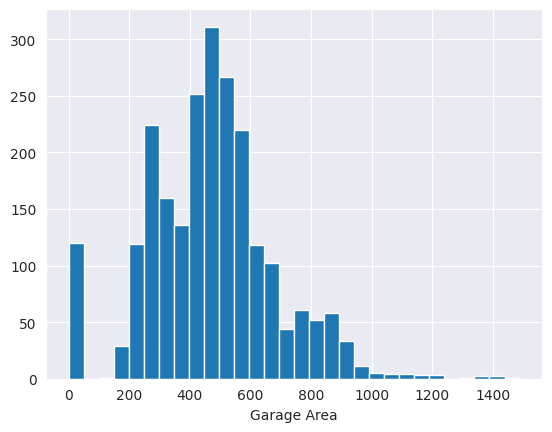

In [ ]:
plt.figure()
plt.hist(x=df["Garage Area"], bins=30)
plt.xlabel("Garage Area")
plt.show()

In [ ]:
df["Garage Area"].mean()

469.07895860008534

In [ ]:
df["Garage Area"].fillna(472, inplace=True)

In [ ]:
df[cat_num].isna().sum()

Overall Qual    0
Full Bath       0
Garage Cars     1
dtype: int64

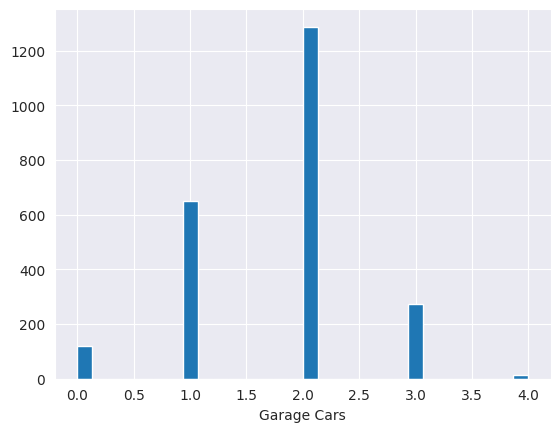

In [ ]:
plt.figure()
plt.hist(x=df["Garage Cars"], bins=30)
plt.xlabel("Garage Cars")
plt.show()

In [ ]:
df["Total Bsmt SF"].fillna(2, inplace=True)

In [ ]:
df[cat_str].isna().sum()

Neighborhood       0
Exter Qual         0
Bsmt Qual         61
Kitchen Qual       0
Garage Finish    122
dtype: int64

In [ ]:
df["Bsmt Qual"].value_counts()

TA    1057
Gd     970
Ex     187
Fa      67
Po       2
Name: Bsmt Qual, dtype: int64

In [ ]:
df["Bsmt Qual"].fillna("TA", inplace=True)

In [ ]:
df["Garage Finish"].value_counts()

Unf    997
RFn    654
Fin    571
Name: Garage Finish, dtype: int64

In [ ]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Condition', 'SalePrice'],
      dtype='object')

In [ ]:
df["Bsmt Qual"].fillna("Unf", inplace=True)

In [92]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Sélectionner les colonnes à utiliser
selected_features = ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config',  'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Condition', 'SalePrice']

# Sélectionner les colonnes numériques
numeric_features = df[selected_features].select_dtypes(include=['int64', 'float64']).columns.tolist()

# Sélectionner les colonnes catégorielles
categorical_features = df[selected_features].select_dtypes(include=['object']).columns.tolist()

# Créer un pipeline de prétraitement pour les variables numériques
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Créer un pipeline de prétraitement pour les variables catégorielles
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Appliquer les transformations sur les colonnes respectives
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Appliquer le prétraitement aux données
processed_data = preprocessor.fit_transform(df[selected_features])


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (4243,) and arg 3 with shape (86,).

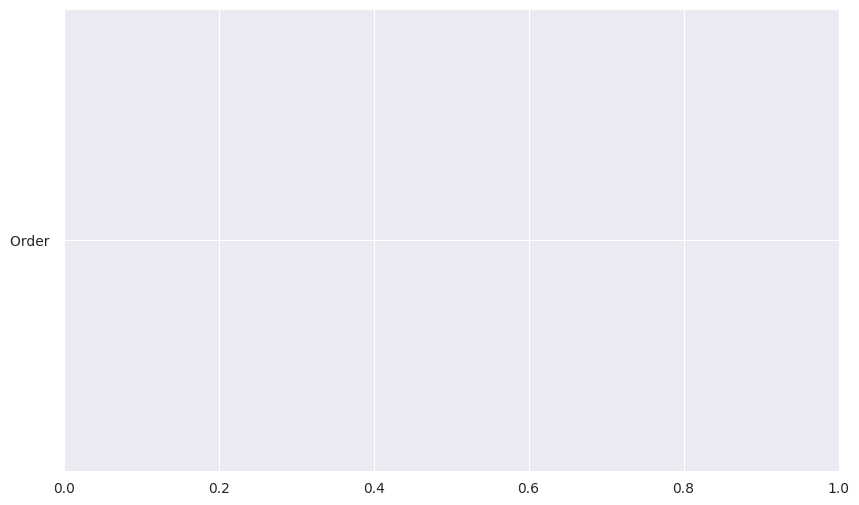

In [94]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Création du modèle de forêt aléatoire
rf_model = RandomForestRegressor(random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
rf_model.fit(processed_data, y_train)

# Récupération de l'importance des variables
importances = rf_model.feature_importances_

# Liste des noms de caractéristiques
feature_names = X_train.columns

# Affichage des importances des variables
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()